## Observations and Insights 

In [3]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [4]:
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# Checking the number of mice

total_mice = mouse_metadata_df["Mouse ID"].count()
total_mice

249

In [6]:
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
mouse_data_complete_df = pd.merge(mouse_metadata_df,study_results_df , how="outer", on=["Mouse ID", "Mouse ID"])
mouse_data_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

In [9]:
clean_mouse_data_complete_df = mouse_data_complete_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
clean_mouse_data_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
clean_mouse_data_complete_df.shape

(1888, 8)

In [11]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data_complete_df["Mouse ID"].count()

1888

In [12]:
df = clean_mouse_data_complete_df.set_index("Drug Regimen")
df.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



# tumor volume and regimen

In [14]:
drug_regimen_df =clean_mouse_data_complete_df[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)","Timepoint"]] 
drug_regimen_df.head()

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
0,Ramicane,k403,45.000000,0
1,Ramicane,k403,38.825898,5
2,Ramicane,k403,35.014271,10
3,Ramicane,k403,34.223992,15
4,Ramicane,k403,32.997729,20


In [15]:
drug_regimen_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [16]:
df = drug_regimen_df.set_index("Drug Regimen")
df.head()

,Mouse ID,Tumor Volume (mm3),Timepoint
Drug Regimen,,,
Ramicane,k403,45.000000,0
Ramicane,k403,38.825898,5
Ramicane,k403,35.014271,10
Ramicane,k403,34.223992,15
Ramicane,k403,32.997729,20


In [17]:
tumor_regimen_ramicane_df = df.loc["Ramicane"]
average = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].mean()
average

Tumor Volume (mm3)    40.216745
dtype: float64

In [18]:
median = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].median()
median

Tumor Volume (mm3)    40.673236
dtype: float64

In [19]:
variance = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].var()
variance

Tumor Volume (mm3)    23.486704
dtype: float64

In [20]:
standard_deviation = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].std()
standard_deviation

Tumor Volume (mm3)    4.846308
dtype: float64

In [21]:
sem = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].sem()
sem

Tumor Volume (mm3)    0.320955
dtype: float64

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [23]:
summary_statistics_df = pd.DataFrame({"Drug Regimen": ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
                                     "Mean": [40.216745,40.675741, 52.884795, 54.033581,52.591172, 54.233149,  53.236507,  55.235638, 52.393463, 54.331565],
                                     "Median": [40.673236, 40.675741, 51.820584, 52.288934,51.776157,  52.431737,  51.818479,  53.698743, 50.909965, 52.509285],
                                     "Variance": [23.486704, 24.947764, 43.128684,61.168083,39.290177, 59.450562, 48.533355, 68.553577,  43.138803, 66.173479],
                                     "Standard Deviation": [4.846308, 4.994774,6.567243, 7.821003, 6.268188, 7.710419,  6.966589,  8.279709, 6.568014, 8.134708],
                                     "SEM": [0.320955, 0.329346, 0.492236,0.581331,0.469821, 0.573111,  0.516398, 0.60386, 0.525862,  0.596466]
})
summary_statistics_df.head(10)

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
8,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [24]:
making_plots_df = clean_mouse_data_complete_df[["Drug Regimen", "Mouse ID","Timepoint"]]
making_plots_df

,Drug Regimen,Mouse ID,Timepoint
0,Ramicane,k403,0
1,Ramicane,k403,5
2,Ramicane,k403,10
3,Ramicane,k403,15
4,Ramicane,k403,20
...,...,...,...
1888,Naftisol,z969,25
1889,Naftisol,z969,30
1890,Naftisol,z969,35
1891,Naftisol,z969,40


In [25]:
Set_df = making_plots_df.set_index("Drug Regimen")
Set_df.head()

,Mouse ID,Timepoint
Drug Regimen,,
Ramicane,k403,0
Ramicane,k403,5
Ramicane,k403,10
Ramicane,k403,15
Ramicane,k403,20


In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

ramicane_df = Set_df.loc["Ramicane"]
ramicane_df

,Mouse ID,Timepoint
Drug Regimen,,
Ramicane,k403,0
Ramicane,k403,5
Ramicane,k403,10
Ramicane,k403,15
Ramicane,k403,20
...,...,...
Ramicane,w678,5
Ramicane,y449,0
Ramicane,y449,5


In [ ]:
len(ramicane_df)

In [28]:
bar_ramicane_df = ramicane_df[["Mouse ID", "Timepoint"]]
bar_ramicane_df

,Mouse ID,Timepoint
Drug Regimen,,
Ramicane,k403,0
Ramicane,k403,5
Ramicane,k403,10
Ramicane,k403,15
Ramicane,k403,20
...,...,...
Ramicane,w678,5
Ramicane,y449,0
Ramicane,y449,5


<IPython.core.display.Javascript object>


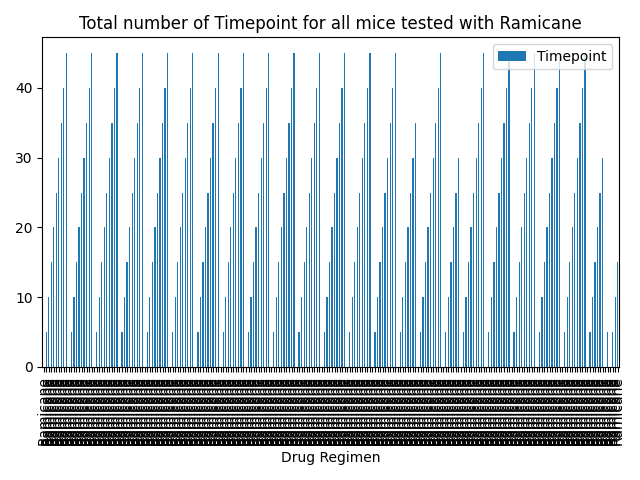

In [29]:
bar_ramicane_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Ramicane")
plt.tight_layout()

In [30]:
Capomulin_df = Set_df.loc["Capomulin"]
Capomulin_df

,Mouse ID,Timepoint
Drug Regimen,,
Capomulin,s185,0
Capomulin,s185,5
Capomulin,s185,10
Capomulin,s185,15
Capomulin,s185,20
...,...,...
Capomulin,i557,45
Capomulin,r157,0
Capomulin,r157,5


<IPython.core.display.Javascript object>


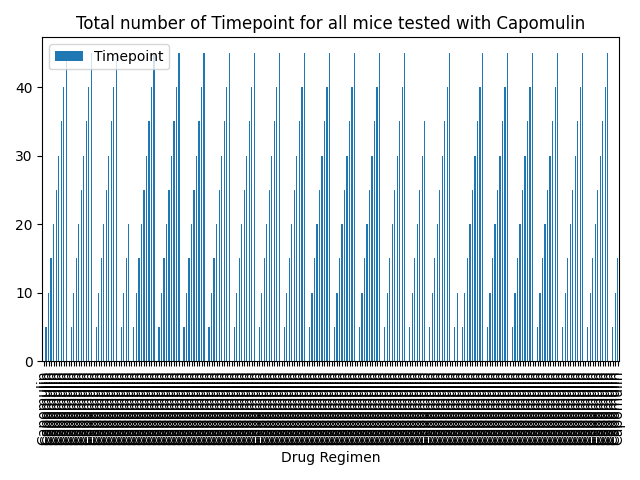

In [31]:
Capomulin_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Capomulin")
plt.tight_layout()

In [32]:
Infubinol_df = Set_df.loc["Infubinol"]
Infubinol_df

,Mouse ID,Timepoint
Drug Regimen,,
Infubinol,a203,0
Infubinol,a203,5
Infubinol,a203,10
Infubinol,a203,15
Infubinol,a203,20
...,...,...
Infubinol,z581,25
Infubinol,z581,30
Infubinol,z581,35


<IPython.core.display.Javascript object>


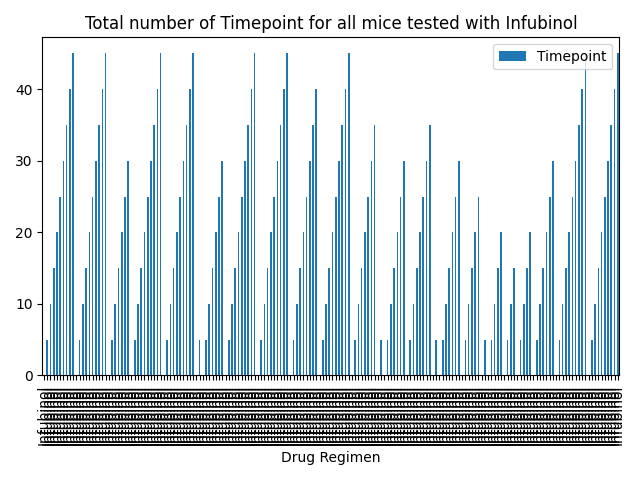

In [33]:
Infubinol_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Infubinol")
plt.tight_layout()

In [34]:
Placebo_df = Set_df.loc["Placebo"]
Placebo_df

,Mouse ID,Timepoint
Drug Regimen,,
Placebo,a262,0
Placebo,a262,5
Placebo,a262,10
Placebo,a262,15
Placebo,a262,20
...,...,...
Placebo,y478,25
Placebo,y478,30
Placebo,y478,35


<IPython.core.display.Javascript object>


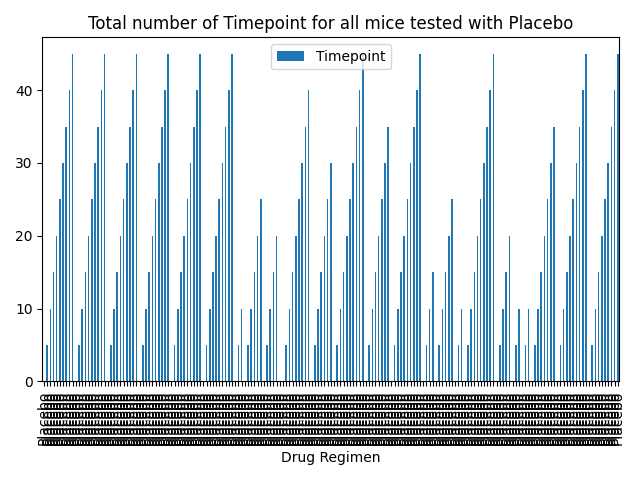

In [35]:
Placebo_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Placebo")
plt.tight_layout()

In [36]:
Ceftamin_df = Set_df.loc["Ceftamin"]
Ceftamin_df

,Mouse ID,Timepoint
Drug Regimen,,
Ceftamin,a275,0
Ceftamin,a275,5
Ceftamin,a275,10
Ceftamin,a275,15
Ceftamin,a275,20
...,...,...
Ceftamin,y865,25
Ceftamin,y865,30
Ceftamin,y865,35


<IPython.core.display.Javascript object>


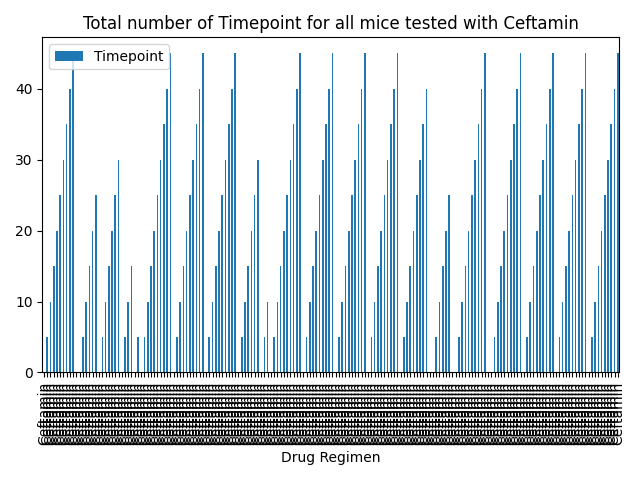

In [37]:
Ceftamin_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Ceftamin")
plt.tight_layout()

In [38]:
Stelasyn_df = Set_df.loc["Stelasyn"]
Stelasyn_df

,Mouse ID,Timepoint
Drug Regimen,,
Stelasyn,a366,0
Stelasyn,a366,5
Stelasyn,a366,10
Stelasyn,a366,15
Stelasyn,a366,20
...,...,...
Stelasyn,x402,35
Stelasyn,x402,40
Stelasyn,x402,45


<IPython.core.display.Javascript object>


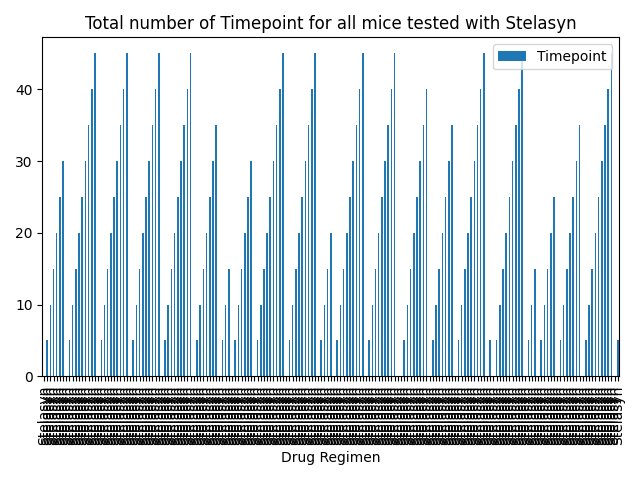

In [39]:
Stelasyn_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Stelasyn")
plt.tight_layout()

In [40]:
Zoniferol_df = Set_df.loc["Zoniferol"]
Zoniferol_df

,Mouse ID,Timepoint
Drug Regimen,,
Zoniferol,a401,0
Zoniferol,a401,5
Zoniferol,a401,10
Zoniferol,a401,15
Zoniferol,a401,20
...,...,...
Zoniferol,w575,45
Zoniferol,x613,0
Zoniferol,x613,5


<IPython.core.display.Javascript object>


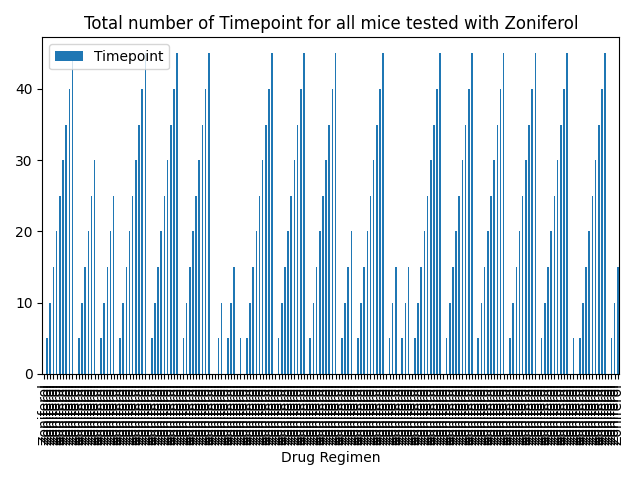

In [41]:
Zoniferol_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Zoniferol")
plt.tight_layout()

In [42]:
Ketapril_df = Set_df.loc["Ketapril"]
Ketapril_df

,Mouse ID,Timepoint
Drug Regimen,,
Ketapril,a457,0
Ketapril,a457,5
Ketapril,a457,10
Ketapril,c580,0
Ketapril,c580,5
...,...,...
Ketapril,y260,25
Ketapril,y260,30
Ketapril,y260,35


<IPython.core.display.Javascript object>


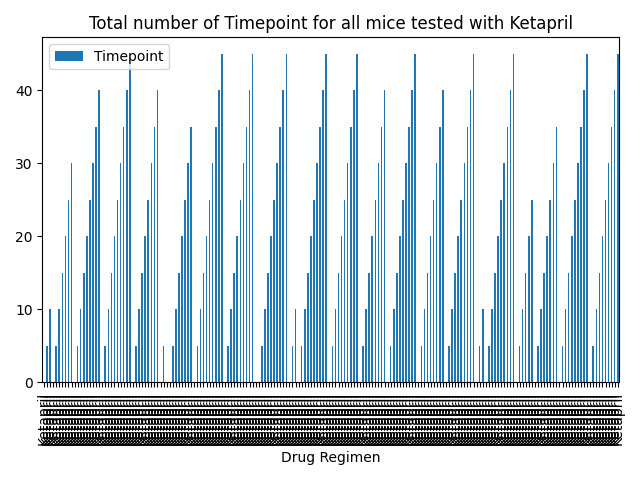

In [43]:
Ketapril_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Ketapril")
plt.tight_layout()

In [44]:
Propriva_df = Set_df.loc["Propriva"]
Propriva_df

,Mouse ID,Timepoint
Drug Regimen,,
Propriva,a699,0
Propriva,a699,5
Propriva,a699,10
Propriva,a699,15
Propriva,a699,20
...,...,...
Propriva,x209,5
Propriva,x209,10
Propriva,z435,0


<IPython.core.display.Javascript object>


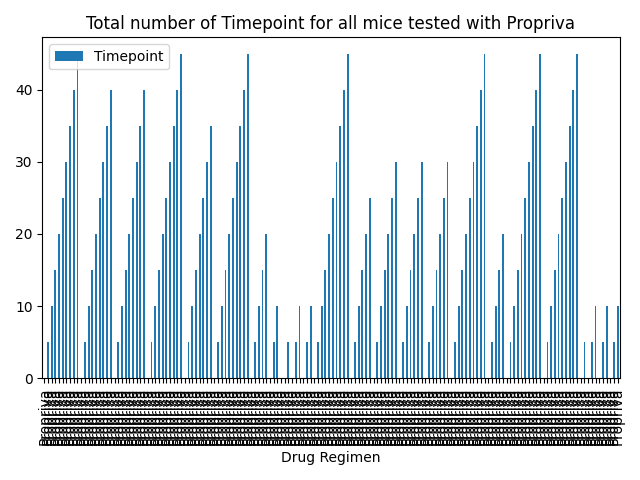

In [45]:
Propriva_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Propriva")
plt.tight_layout()

In [46]:
Naftisol_df = Set_df.loc["Naftisol"]
Naftisol_df

,Mouse ID,Timepoint
Drug Regimen,,
Naftisol,a818,0
Naftisol,a818,5
Naftisol,a818,10
Naftisol,a818,15
Naftisol,a818,20
...,...,...
Naftisol,z969,25
Naftisol,z969,30
Naftisol,z969,35


In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# plot = df.plot.pie(y='mass', figsize=(5, 5)



pieplot

In [52]:
df = clean_mouse_data_complete_df.set_index("Drug Regimen")
df.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1


In [53]:
df.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1


In [54]:
ramicane_p_df = df.loc["Ramicane"]
ramicane_p_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
Ramicane,w678,Female,5,24,5,43.166373,0
Ramicane,y449,Male,19,24,0,45.000000,0
Ramicane,y449,Male,19,24,5,45.877545,0


## Quartiles, Outliers and Boxplots

In [191]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [192]:
df = clean_mouse_data_complete_df.set_index("Drug Regimen")
df.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1


In [77]:
ramicane_volume_df = df.loc["Ramicane"]
ramicane_volume_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
Ramicane,w678,Female,5,24,5,43.166373,0
Ramicane,y449,Male,19,24,0,45.000000,0
Ramicane,y449,Male,19,24,5,45.877545,0


In [78]:
total_volume_df = ramicane_volume_df.loc["Ramicane"]
total = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].max()
total

Tumor Volume (mm3)    47.622816
dtype: float64

In [195]:
Capomulin_volume_df = df.loc["Capomulin"]
Capomulin_volume_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,s185,Female,3,17,0,45.000000,0
Capomulin,s185,Female,3,17,5,43.878496,0
Capomulin,s185,Female,3,17,10,37.614948,0
Capomulin,s185,Female,3,17,15,38.177232,0
Capomulin,s185,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...
Capomulin,i557,Female,1,24,45,47.685963,1
Capomulin,r157,Male,22,25,0,45.000000,0
Capomulin,r157,Male,22,25,5,45.597064,0


In [79]:
total_volume_df = Capomulin_volume_df.loc["Capomulin"]
total = total_volume_df[["Tumor Volume (mm3)"]].max()
total

Tumor Volume (mm3)    48.158209
dtype: float64

In [81]:
Infubinol_volume_df = df.loc["Infubinol"]
Infubinol_volume_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,Female,20,23,0,45.000000,0
Infubinol,a203,Female,20,23,5,48.508468,0
Infubinol,a203,Female,20,23,10,51.852437,1
Infubinol,a203,Female,20,23,15,52.777870,1
Infubinol,a203,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...
Infubinol,z581,Female,24,25,25,54.316407,2
Infubinol,z581,Female,24,25,30,56.286750,2
Infubinol,z581,Female,24,25,35,58.628399,3


In [82]:
total_volume_df = Infubinol_volume_df.loc["Infubinol"]
total = total_volume_df[["Tumor Volume (mm3)"]].max()
total

Tumor Volume (mm3)    72.226731
dtype: float64

In [83]:
Ceftamin_volume_df = df.loc["Ceftamin"]
Ceftamin_volume_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ceftamin,a275,Female,20,28,0,45.000000,0
Ceftamin,a275,Female,20,28,5,46.795257,0
Ceftamin,a275,Female,20,28,10,47.371343,0
Ceftamin,a275,Female,20,28,15,49.734404,0
Ceftamin,a275,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...
Ceftamin,y865,Male,23,26,25,57.173538,2
Ceftamin,y865,Male,23,26,30,59.033275,3
Ceftamin,y865,Male,23,26,35,61.153140,3


In [84]:
total_volume_df = Ceftamin_volume_df.loc["Ceftamin"]
total = total_volume_df[["Tumor Volume (mm3)"]].max()
total

Tumor Volume (mm3)    68.923185
dtype: float64

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [61]:
Capomulin_volume_df = df.loc["Capomulin"]
Capomulin_volume_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,s185,Female,3,17,0,45.000000,0
Capomulin,s185,Female,3,17,5,43.878496,0
Capomulin,s185,Female,3,17,10,37.614948,0
Capomulin,s185,Female,3,17,15,38.177232,0
Capomulin,s185,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...
Capomulin,i557,Female,1,24,45,47.685963,1
Capomulin,r157,Male,22,25,0,45.000000,0
Capomulin,r157,Male,22,25,5,45.597064,0


In [68]:
c_df = Capomulin_volume_df.set_index("Mouse ID")
c_df.head()

,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,
s185,Female,3,17,0,45.000000,0
s185,Female,3,17,5,43.878496,0
s185,Female,3,17,10,37.614948,0
s185,Female,3,17,15,38.177232,0
s185,Female,3,17,20,36.866876,0


In [70]:
capomulin_s185_df = c_df.loc["s185"]
capomulin_s185_df

,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,
s185,Female,3,17,0,45.000000,0
s185,Female,3,17,5,43.878496,0
s185,Female,3,17,10,37.614948,0
s185,Female,3,17,15,38.177232,0
s185,Female,3,17,20,36.866876,0
s185,Female,3,17,25,33.949940,0
s185,Female,3,17,30,32.959671,1
s185,Female,3,17,35,28.328531,1
s185,Female,3,17,40,25.472143,1


<IPython.core.display.Javascript object>


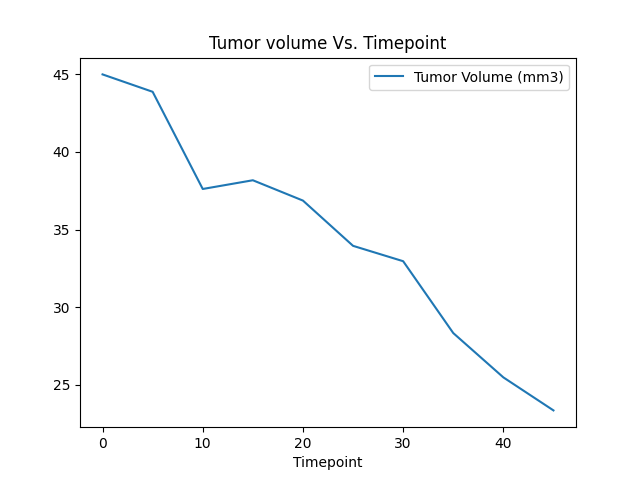

<AxesSubplot:title={'center':'Tumor volume Vs. Timepoint'}, xlabel='Timepoint'>

In [71]:
capomulin_s185_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", title="Tumor volume Vs. Timepoint")

In [209]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

<IPython.core.display.Javascript object>


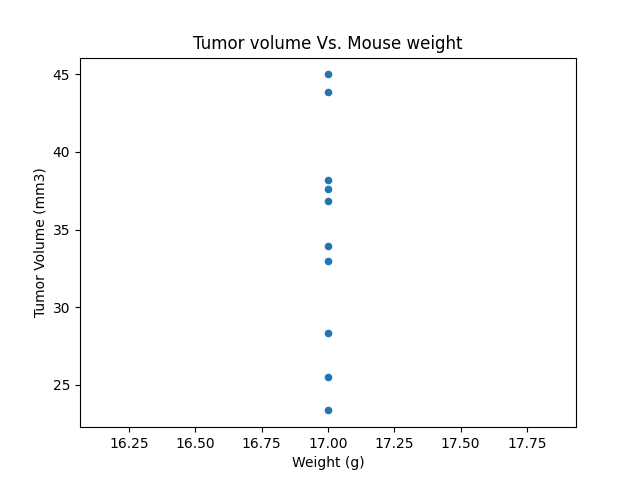

<AxesSubplot:title={'center':'Tumor volume Vs. Mouse weight'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

In [72]:
capomulin_s185_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Tumor volume Vs. Mouse weight")

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
